In [ ]:
from scipy import ndimage, misc
import numpy.fft
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
img = Image.open("/content/drive/MyDrive/Content/knig1.jpg")
img2 = Image.open("/content/drive/MyDrive/Content/knig2.jpg")

Mounted at /content/drive


In [ ]:
img.size

(1200, 772)

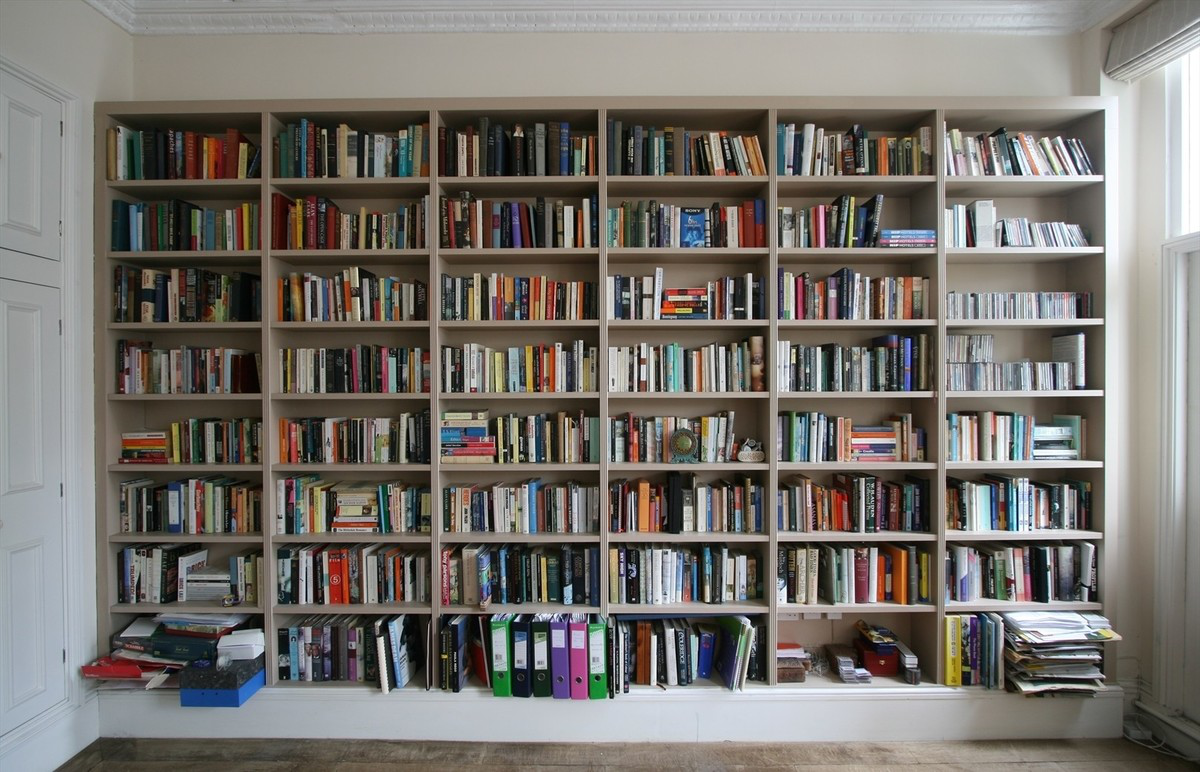

In [ ]:

img

In [ ]:
img2.size

(234, 255)

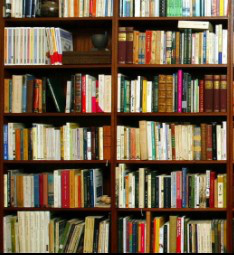

In [ ]:

img2

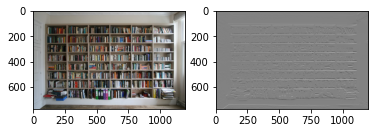

In [ ]:
k = np.array([[-10, -10, -10], [0, 0, 0], [10, 10, 10]])

grey = np.dot(np.asarray(img)[...,:3], [1, 1, 1])
res = ndimage.convolve(grey, k, mode='wrap')

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.gray()
ax1.imshow(img)
ax2.imshow(res)
plt.show()

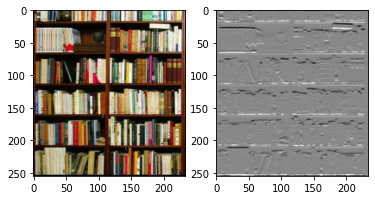

In [ ]:
k = np.array([[-10, -10, -10], [0, 0, 0], [10, 10, 10]])

grey = np.dot(np.asarray(img2)[...,:3], [1, 1, 1])
res2 = ndimage.convolve(grey, k, mode='wrap')

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.gray()
ax1.imshow(img2)
ax2.imshow(res2)
plt.show()

In [ ]:
out = Image.new('RGB', (img.size[0], img.size[1]), (0, 0, 128))
imag1 = ImageDraw.Draw(out)

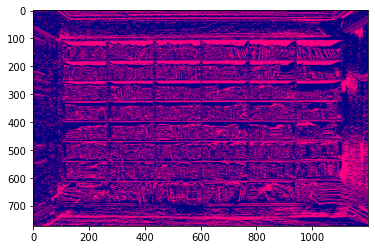

In [ ]:
for x in range(img.size[0]):
    for y in range(0, img.size[1]):
        if (res[y, x] > 50):
            imag1.point((x, y), (255, 0, 128))
plt.imshow(out)

In [ ]:
out = Image.new('RGB', (img2.size[0], img2.size[1]), (0, 128, 0))
imag2 = ImageDraw.Draw(out)

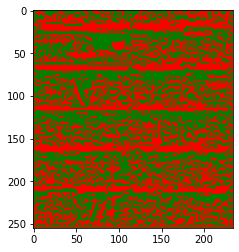

In [ ]:
for x in range(img2.size[0]):
    for y in range(0, img2.size[1]):
        if (res2[y, x] > 50):
            imag2.point((x, y), (255, 0, 0))
plt.imshow(out)

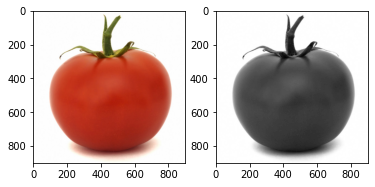

In [ ]:
image3 =  Image.open("/content/drive/MyDrive/Content/P4.jpg")

pic = image3.load()
fig, (colorplt, grayplt) = plt.subplots(1, 2)
colorplt.imshow(image3)
gray = np.dot(np.asarray(image3)[...,:3],[1,1,1])
plt.gray()
grayplt.imshow(gray)

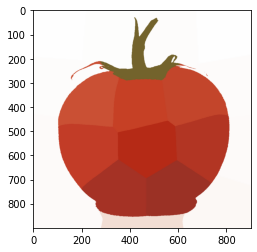

In [ ]:
from sklearn.cluster import KMeans
db = KMeans(n_clusters=20) 

pic_array = [(x, y, pic[x, y][0], pic[x, y][1], pic[x, y][2]) for x in range(image3.size[0]) for y in range(image3.size[1])]
db_clusters=db.fit_predict(pic_array)


for p, c in zip(pic_array, db_clusters):
    pic[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), int(db.cluster_centers_[c, 3]), int(db.cluster_centers_[c, 4]))
    
ax = plt.subplot()
ax.imshow(image3);

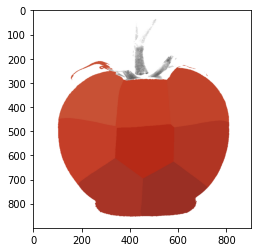

In [ ]:
pic = image3.load()
curr = -1
for p, c in zip(pic_array, db_clusters):

    if int(db.cluster_centers_[c, 2]) > 120 and \
       int(db.cluster_centers_[c, 3]) > 0 and \
       int(db.cluster_centers_[c, 3]) < 140 and \
       int(db.cluster_centers_[c, 4]) < 160 and \
       int(db.cluster_centers_[c, 4]) > 0:
       continue
    else:
        grey = int(gray[p[1], p[0]])
        pic[p[0], p[1]] = (grey, grey, grey)

ax = plt.subplot()
ax.imshow(image3);

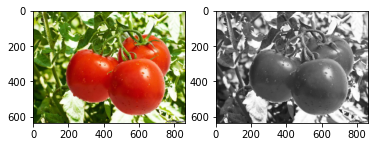

In [ ]:
image4 = Image.open("/content/drive/MyDrive/Content/P2.jpg")
pic = image4.load()
fig, (colorplt, grayplt) = plt.subplots(1, 2)
colorplt.imshow(image4)
gray = np.dot(np.asarray(image4)[...,:3], [0.2989, 0.5870, 0.1140])
plt.gray()
grayplt.imshow(gray)

In [ ]:
from sklearn.cluster import KMeans
db = KMeans(n_clusters=30)

pic_array = [(x, y, pic[x, y][0], pic[x, y][1], pic[x, y][2]) for x in range(image4.size[0]) for y in range(image4.size[1])]
db_clusters=db.fit_predict(pic_array)

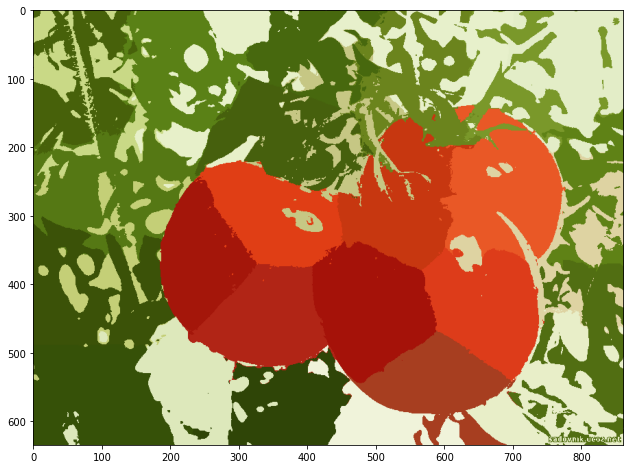

In [ ]:
for p, c in zip(pic_array, db_clusters):
    pic[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                        int(db.cluster_centers_[c, 3]), 
                        int(db.cluster_centers_[c, 4]))
    
plt.rcParams['figure.figsize'] = (12, 8)        
ax = plt.subplot()
ax.imshow(image4);

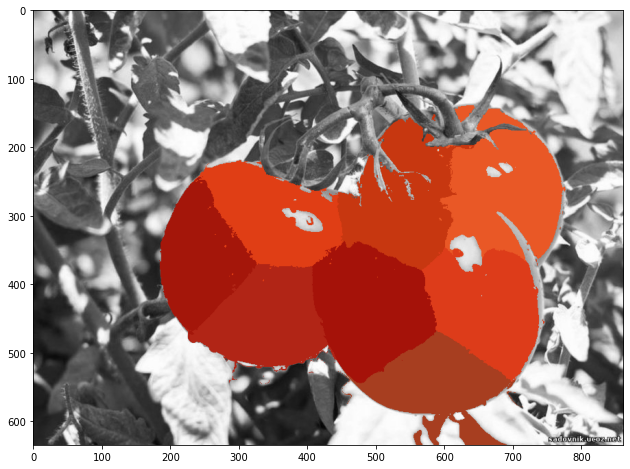

In [ ]:
pic = image4.load()
curr = -1
for p, c in zip(pic_array, db_clusters):

    if int(db.cluster_centers_[c, 2]) > 120 and \
       int(db.cluster_centers_[c, 3]) > 0 and \
       int(db.cluster_centers_[c, 3]) < 140 and \
       int(db.cluster_centers_[c, 4]) < 160 and \
       int(db.cluster_centers_[c, 4]) > 0:
       continue
    else:
        grey = int(gray[p[1], p[0]])
        pic[p[0], p[1]] = (grey, grey, grey)


ax = plt.subplot()
ax.imshow(image4);